
# Lab One: Exploring Table Data

### Dataset: Housing in London
Group: Benjamin Kuo & Nick Benso


GitHub with Jupyter Notebooks: https://www.youtube.com/watch?v=I32iNXjnSpE&ab_channel=RishabhShrestha

### Load Dataset and Define Data Types

What data type should be used to represent each data attribute? 
This dataset for housing in London on a monthly basis contains 12 different attributes including: 
- date
- area
- average house price
- code
- houses sold
- number of crimes 
- flag indicating if city is a borough of London

Most of the data is numeric data and should be represented as floats. While the date feature can be used and compared as a string object type, it should be converted to a date data type for ease of use and readability. The area feature is a categorical attribute consisting of 45 different areas in London, meaning that it is nominal data that can be represented with one hot encoding. The code feature is a string object data type and should stay that way as it is a combination of letters and numbers. Lastly, the borough flag feature is a binary data type annd should be represented as a boolean, since it is a flag which is either true or false.

Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

As the main goal is to predict the housing market for various locations in London, the main attributes of importance likely are: date, area, housing price, houses sold, and amount of crime. It is important to note that the code is essentially the area attribute but encoded so one of these can be removed. Dates can be important as there may be seasonal swings in the housing market, where housing is higher in demand during certain seasons which can affect the prices as well as number sold. The housing prices and houses sold will be crucical to determining the housing market for certain areas. The amount of crime could also be informative, as it may affect public perception of the area and as a result affect prices changes and the number of houses sold. Lastly, the borough flag attribute could be important as it could indicate that the area is more well known or larger, which could potentially affect the overall statistics of the area, but this affect would likely be minimal.


In [103]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib

df = pd.read_csv('london_housing_monthly.csv') # read in the csv file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None


In [105]:
# separate data types
date_features = 'date'
bool_features = 'borough_flag'
numerical_features = ['average_price','houses_sold','no_of_crimes']
area_categories = df['area'].unique()

# define with correct data types
df[date_features] = df[date_features].astype(np.datetime64)
df[bool_features] = df[bool_features].astype(bool)
df[numerical_features] = df[numerical_features].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  float64       
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 648.5+ KB


### Verify data quality
Explain any missing values or duplicate data. 
Visualize entries that are missing/complete for different attributes. 
Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

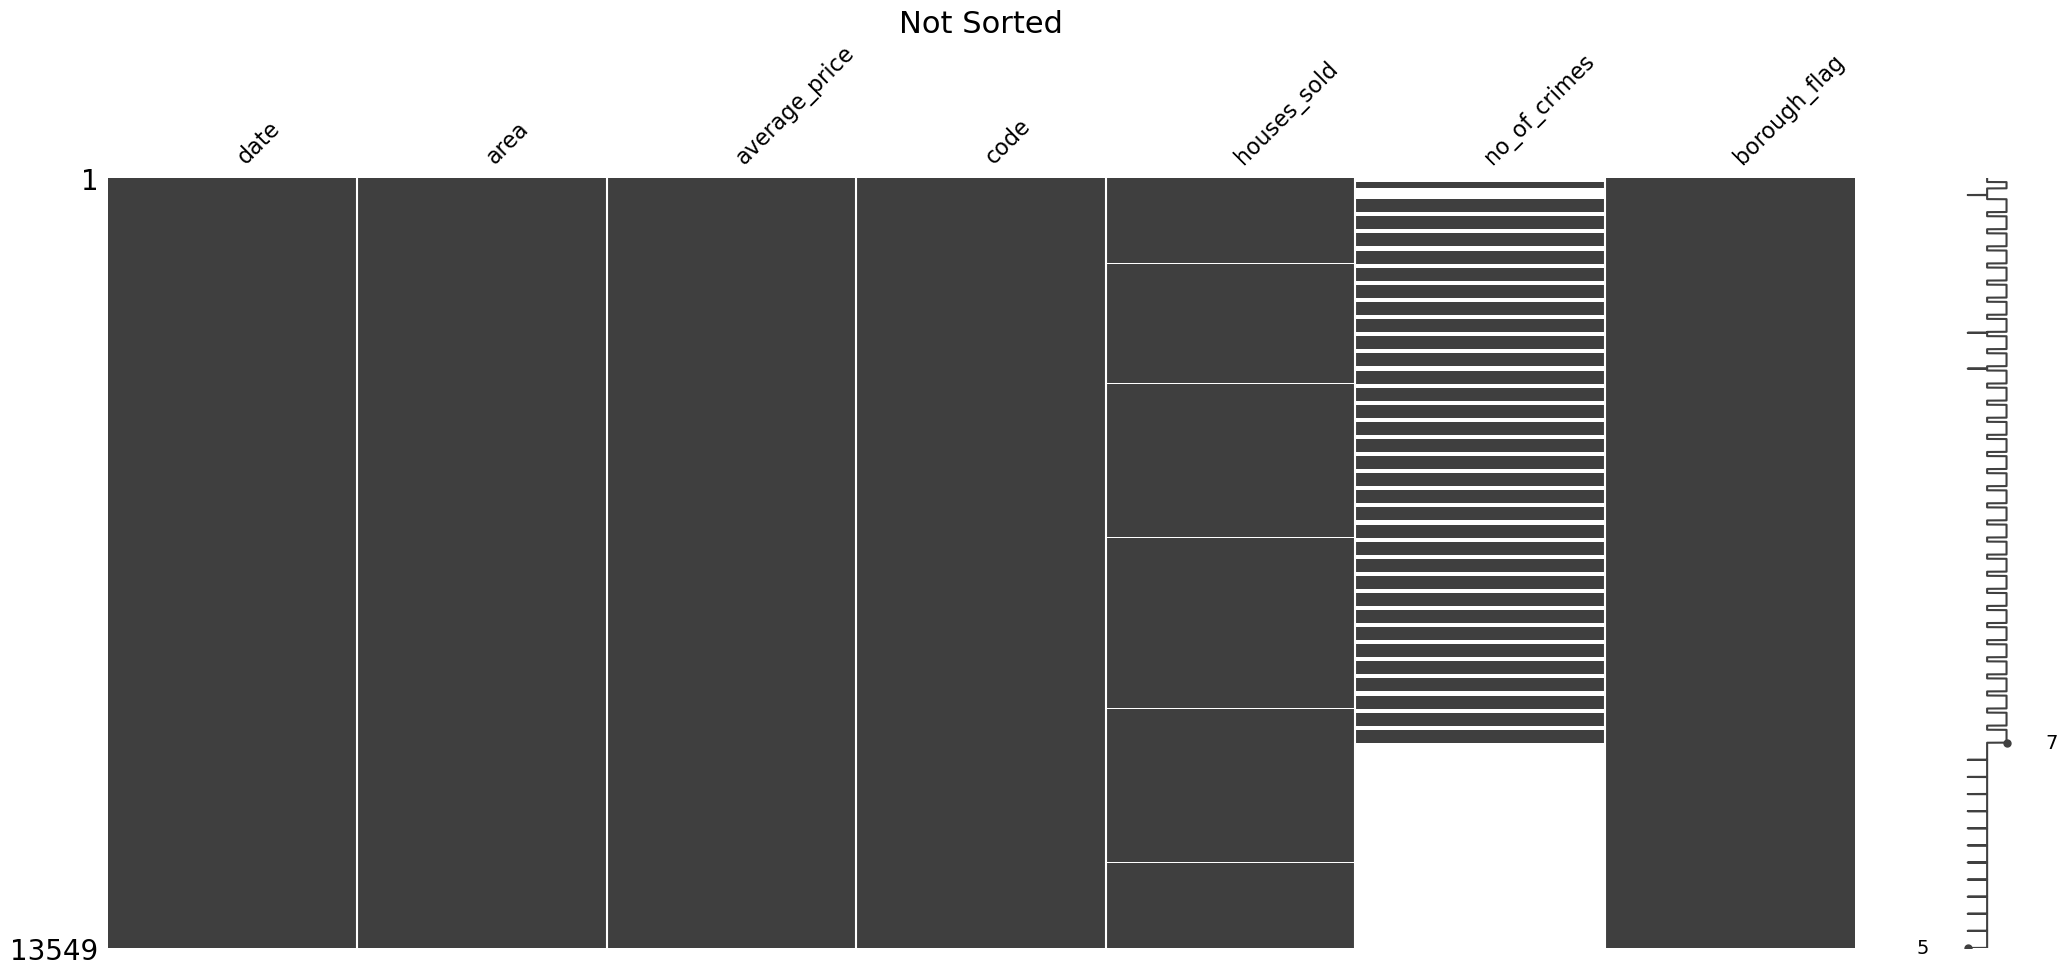

<Figure size 640x480 with 0 Axes>

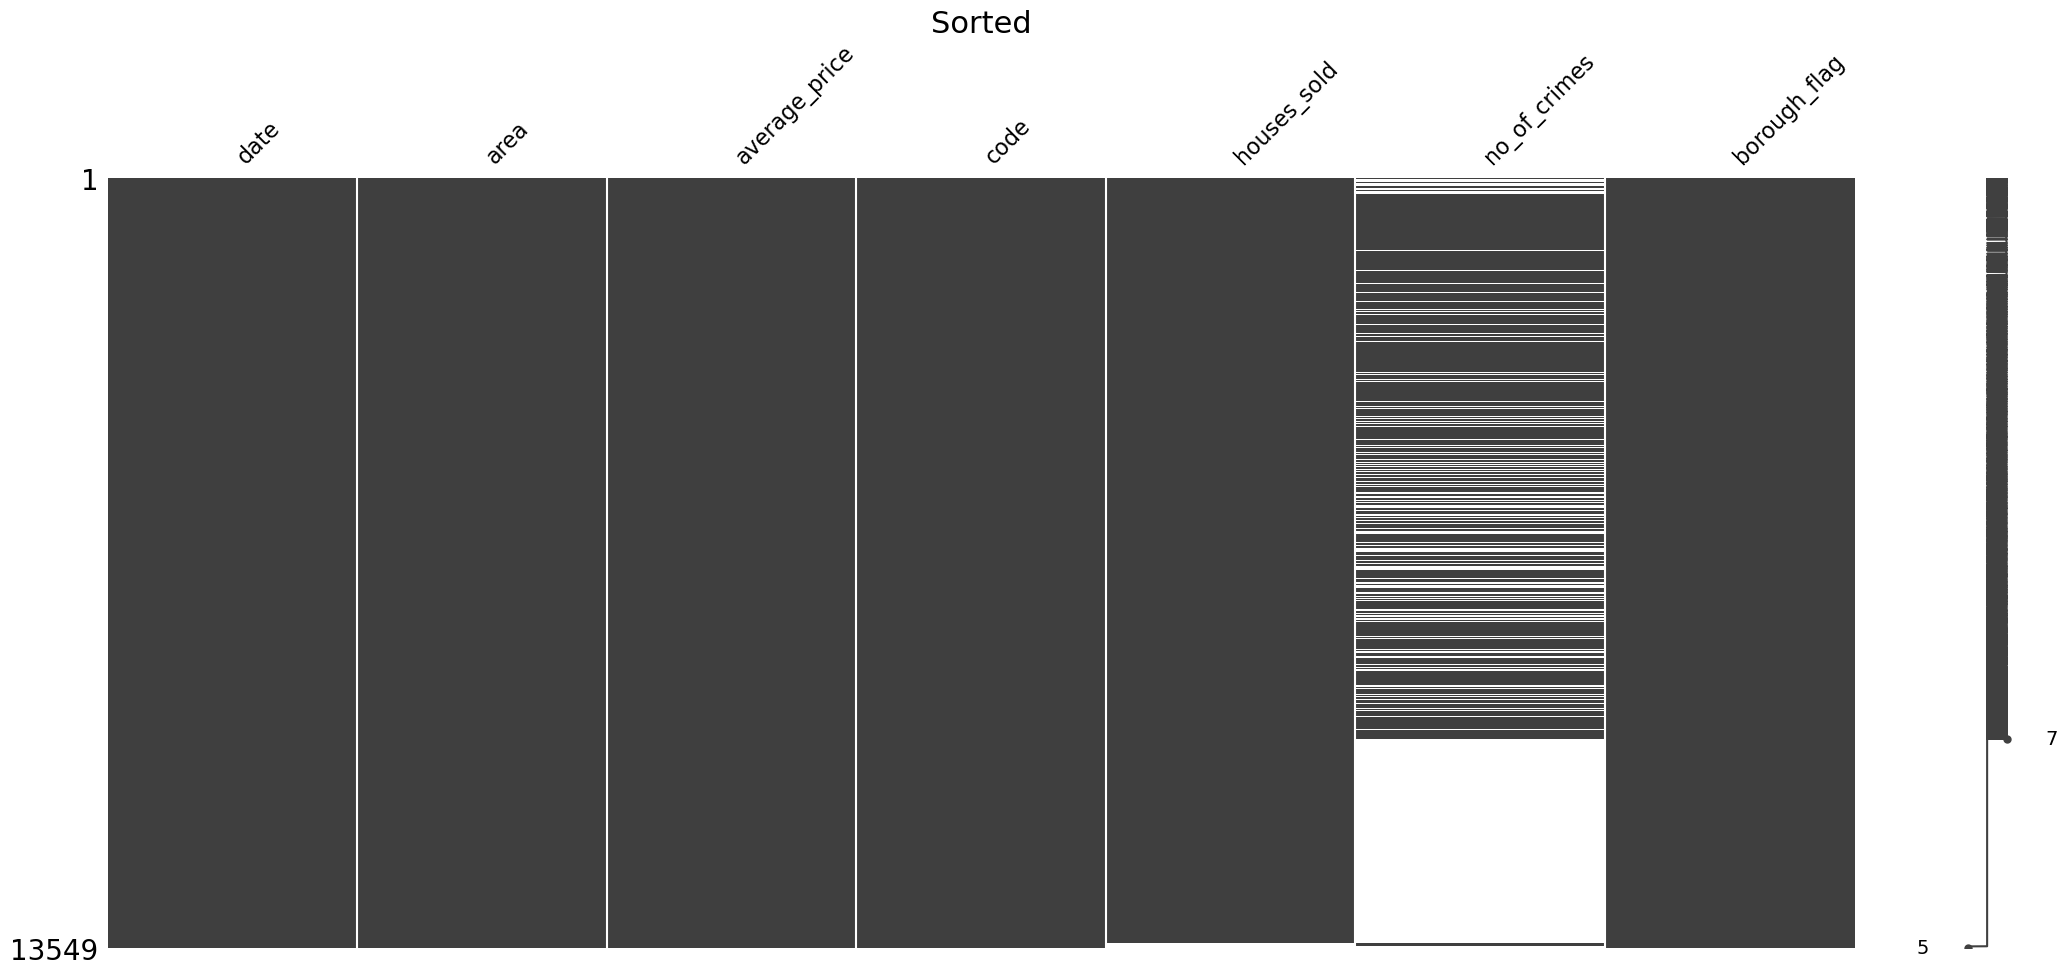

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)
plt.figure()

mn.matrix(df.sort_values(by=["houses_sold","no_of_crimes"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [111]:
# Remove unimportant attributes
for col in ['code','borough_flag']:
    if col in df:
        del df[col]
        
# Split, impute, combine

# First group data by area
df_grouped = df.groupby(by=['area']) # perform the grouping of thing related to 'age'
func = lambda grp: grp.fillna(grp.mean()) # within groups, fill using median (define function to do this)
numeric_columns = ['date','average_price','houses_sold','no_of_crimes'] # only transform numeric columns
df_imputed_sic = df_grouped[numeric_columns].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_imputed_sic.columns)) # in case the median operation deleted columns
df_imputed_sic[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_imputed_sic.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed_sic.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 9937
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           9936 non-null   datetime64[ns]
 1   average_price  9936 non-null   float64       
 2   houses_sold    9936 non-null   float64       
 3   no_of_crimes   9936 non-null   float64       
 4   area           9936 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 465.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  float64       
 3   houses_sold    13455 non-null  float64       
 4   no_of_crimes   7439 non-null   float64       

C:\Users\benny\AppData\Local\Temp\ipykernel_65576\823938911.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  func = lambda grp: grp.fillna(grp.mean()) # within groups, fill using median (define function to do this)


### References:

Dataset: https://www.kaggle.com/datasets/justinas/housing-in-london?resource=download